# DSCI 100 Project: Predicting Minecraft Player Subscription Using Age and Played Hours

**Name:** Andrew Ip

**Section:** DSCI 100 Section 003

**Date:** June 11, 2025

In [1]:
## Run this cell before continuing.

library(tidyverse)
library(tidymodels)
library(repr)
set.seed(1)  # We will set the seed once here so our results are reproducible

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Introduction

**Background** 

UBC Computer Science research group has set up a video game research server in order to study video game habits (Chen & Lee, 2025). The server they have set up is a Minecraft server, an online video game where players build their own world using bricks. This analysis aims to study the trends that might exist between variables in the collected data. Understanding these trends and relationships in the data can inform the reserach group's recruitment efforts as well as make sure that sufficient resource supplies are prepared (Chen & Lee, 2025). Particularly, one of the main questions asked by the researchers is "What player characteristics and behaviours can be predictive of them subscribing to a game-related newsletter?" (Chen & Lee, 2025). This analysis seeks to find a specific answer to the above question by studying the relationship between subscription, the players' ages, and hours players have spent in the Minecraft server.

**Question** 

The specific question that this analysis answers is: **Can the players' ages and hours played in the Minecraft server be used to predict whether they have a game-related newsletter subscription?**

**Data Description** 

The dataset used to answer the specific question is a `.csv` file called `players.csv`, which is loaded at the beginning of the Methods and Results section. This dataset was collected by a Computer Science research group at UBC lead by Frank Wood (Chen & Lee, 2025). Players' actions in the Minecraft server are recorded, and their information as well as time spent on the server are also recorded.

The dataset `players.csv` contains 7 variables and 196 observations.

The variables are:

- `experience` (character type): player's experience (Beginner, Regular, Amateur, Veteran, Pro)
- `subscribe` (logical type): whether or not the player has a game newsletter subscription (TRUE or FALSE)
- `hashedEmail` (character type): email of the player (hashed)
- `played_hours` (double type): hours the player played on the Minecraft server
- `name` (character type): the name of the player
- `gender` (character type): the gender of the player
- `Age` (double type): the age of the player

For the analysis in this project, the variables that are of interest are `subscribe`, `played_hours`, and `Age`. Specifically, the dataset will be cleaned and tidied with only the three variables of interest, and a series of visualizations will be made to study trends between subscription, played hours, and age.

**Hypothesis** 

The hypothesis of this study is: *Players' ages and hours played in the Minecraft server can be used to predict whether they will have a game-related newsletter subscription.* The analysis will be conducted by training a K-nearest neighbor classification model and then testing it using a validation set to determine the accuracy of using the selected variables to predict player subscriptions.

## Methods and Results

### Reading, Cleaning, and Visualizing Data

First, load the data set using a URL to the file stored in the GitHub repository. The `players.csv` file will be used for analysis. 

In [2]:
url <- "https://raw.githubusercontent.com/andrew11i/AI-dsci-100-project-2025ss/refs/heads/main/players.csv"

players <- read_csv(url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Next, use the `as_factor` function to change the `subscribe` column from logical to factor type. Also, use `fct_recode` to rename "TRUE" as "Subscribed" and "FALSE" as "Not Subscribed". Lastly, select only the columns of interest (`subscribe`, `played_hours`, and `Age`).

In [3]:
players_clean <- players |>
  mutate(subscribe = as_factor(subscribe)) |>
  mutate(subscribe = fct_recode(subscribe, "Subscribed" = "TRUE", "Not Subscribed" = "FALSE")) |>
  select(subscribe, played_hours, Age)
head(players_clean)

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
Subscribed,30.3,9
Subscribed,3.8,17
Not Subscribed,0.0,17
Subscribed,0.7,21
Subscribed,0.1,21
Subscribed,0.0,17


This cleaned dataset is now modified, contains only 3 columns of interest, and can be worked with. 

Next, some visualizations are created to study the relationships between age, played hours, and subscription. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


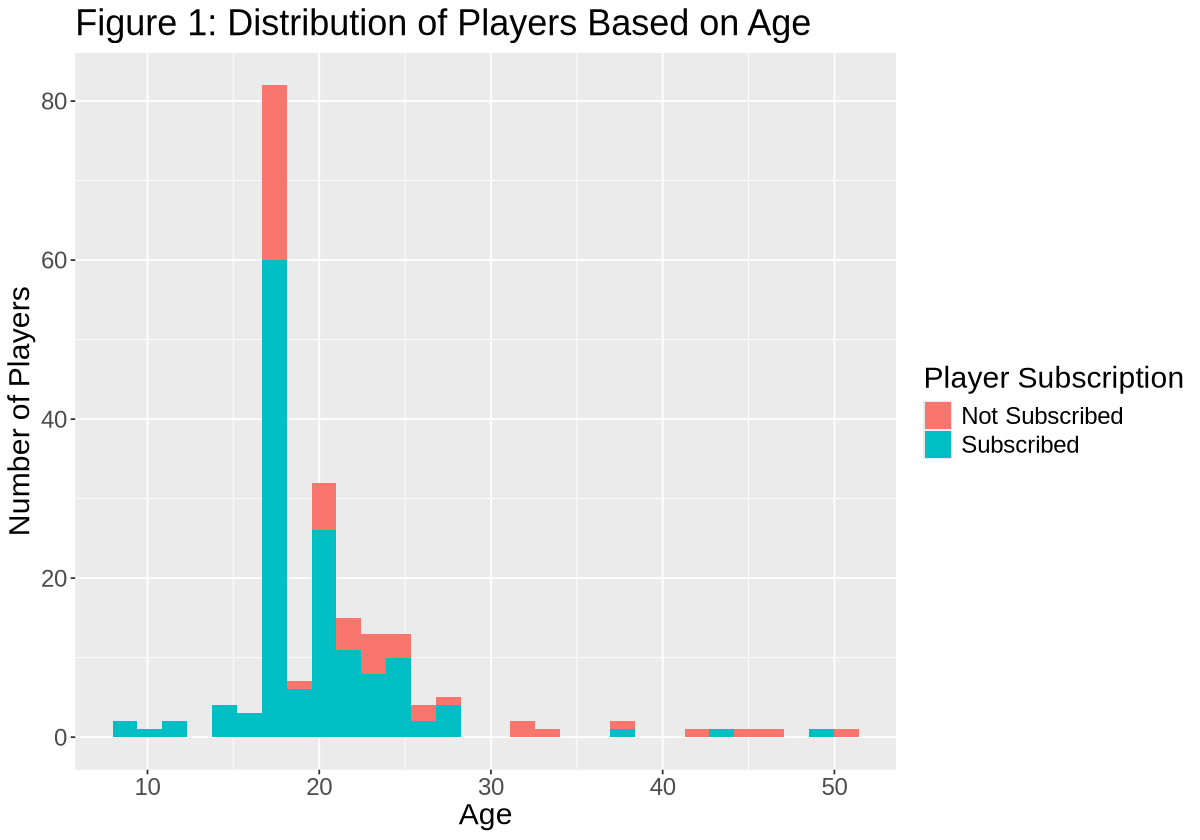

In [4]:
options(repr.plot.width = 10, repr.plot.height = 7)

## This histogram shows the distribution of age and is coloured based on subscription

ggplot(players_clean, aes(x = Age, fill = subscribe)) +
  geom_histogram() +
  labs(x = "Age", y = "Number of Players", fill = "Player Subscription") +
  ggtitle("Figure 1: Distribution of Players Based on Age") +
  theme(text = element_text(size = 18))

**Explanation:** In most age group, there are players who are subscribed. Based on age alone, it may be difficult to predict subscription.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


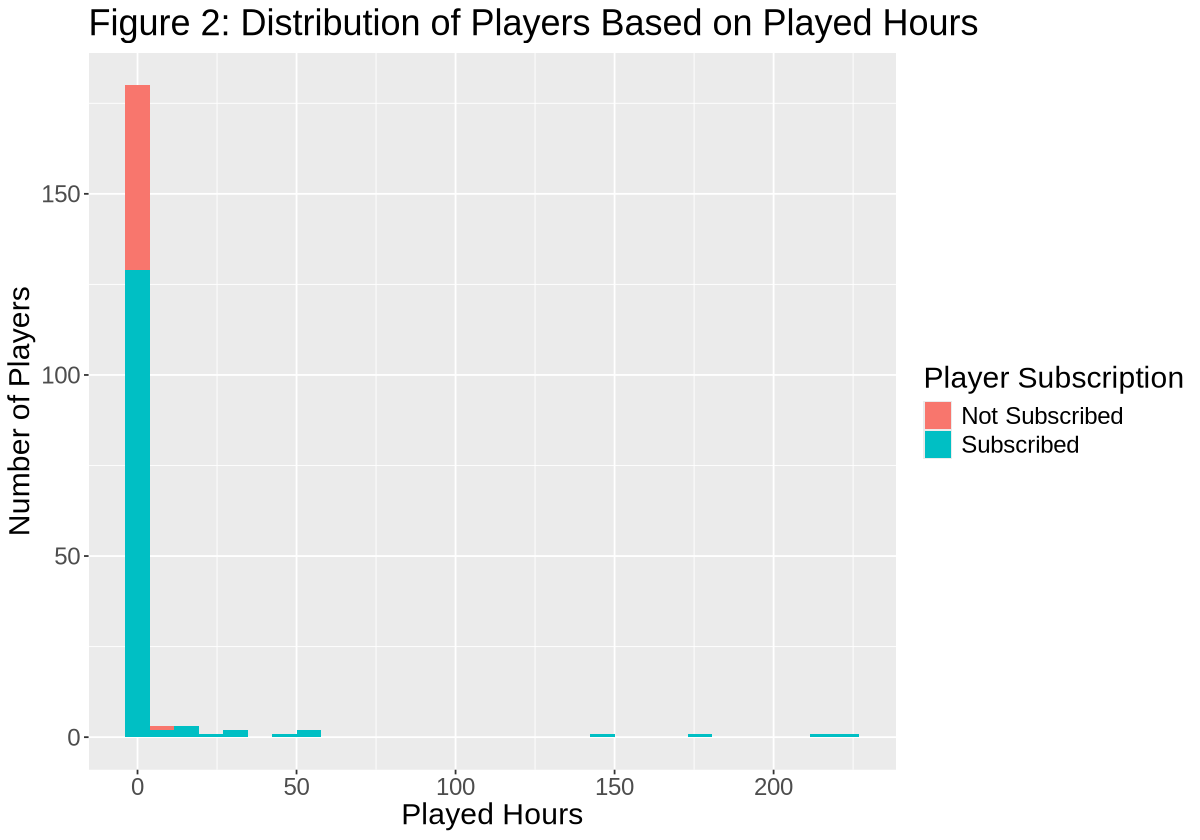

In [5]:
## This histogram shows the distribution of played hours and is coloured based on subscription

ggplot(players_clean, aes(x = played_hours, fill = subscribe)) +
  geom_histogram() +
  labs(x = "Played Hours", y = "Number of Players", fill = "Player Subscription") +
  ggtitle("Figure 2: Distribution of Players Based on Played Hours") +
  theme(text = element_text(size = 18))

**Explanation:** Most players who have played more than 25 hours are all subscribed. However, about 30% of the players who played less than 25 hours are subscribed. Thus, we can expect players who have played more than 25 hours to be subscribed.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


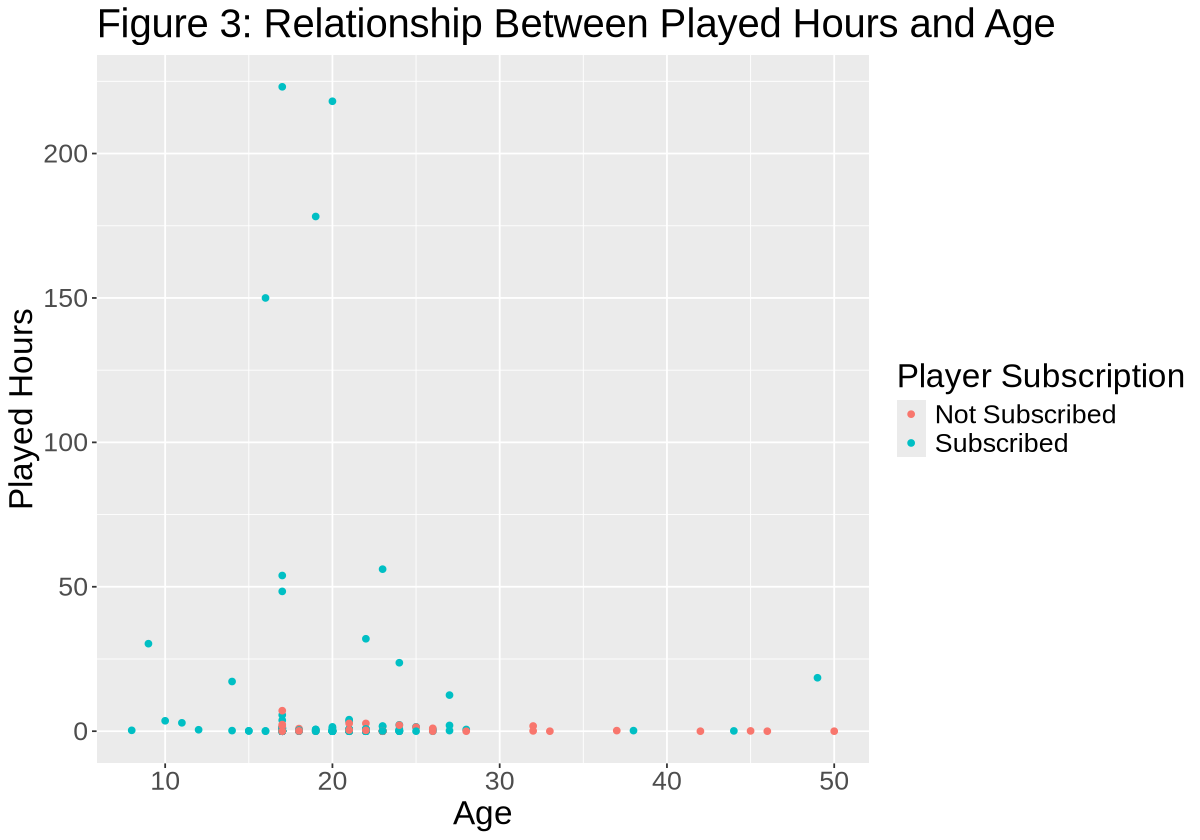

In [6]:
## This scatter plot shows the relationship between age and played hours

ggplot(players_clean, aes(x = Age, y = played_hours, colour = subscribe)) +
  geom_point() +
  labs(x = "Age", y = "Played Hours", colour = "Player Subscription") +
  ggtitle("Figure 3: Relationship Between Played Hours and Age") +
  theme(text = element_text(size = 20))

**Explanation:** This scatter plot shows that there is not a clear relationship between age and played hours. The points seem to be scattered and no visble trend can be identified.

### Analyzing Data

Now, the data analysis begins. The model that is used for analysis is K-nearest neighbor classification. This method is appropriate for this analysis because the response variable, `subscribe`, is a factor, and it can be predicted using the classification method. 

**Summary Statistics:** Below are the summary statistics for `played_hours` and `Age` in the `players_clean` data frame.

In [8]:
summarize(players_clean, 
          max_hours = max(played_hours),
          mean_hours = mean(played_hours),
          min_hours = min(played_hours),
          max_age = max(Age, na.rm = TRUE),
          mean_age = mean(Age, na.rm = TRUE),
          min_age = min(Age, na.rm = TRUE),
         )

max_hours,mean_hours,min_hours,max_age,mean_age,min_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
223.1,5.845918,0,50,20.52062,8


The summary statistics above, along with the visualizations created previously, can inform some advantages and disadvantages of using K-nearest neighbor classification in this project.

Firstly, it is known that K-nearest neighbor works well even for datasets that do not have a definite shape. This is because K-nearest neighbor depends on the straight-line distance between points to determine the class of a new, unknown observation. This is the advantage of using the K-nearest neighbor model for this analysis as the Played Hours vs. Age plot does not show a relationship between the variables nor a definite shape.

However, one limitation of using a K-nearest neighbor classification model is that the prediction may not be very accurate as the data does not seem to be spread out evenly. As seen in Figure 2, all players who have played more than 25 hours are all subscribed. Also, in Figure 3, for ages between 15 and 25, the points are all clustered. This region matches the average played hours (5.8 hours) and average age (21) in the summary statistics from above. This can affect the accuracy of the prediction diffult as K-nearest neighbour depends on distance, but all of those clustered points are so close to each other. 

To train and evaluate the K-nearest neighbor model, begin by splitting the data. 75% of the data will be used as the training set and the remaining 25% will be used as the testing set.

In [9]:
players_split <- initial_split(players_clean, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

Begin the analysis with 5 neighbors, and the model will be tuned using 5-fold cross-validation. 

In [10]:
## Create the model specification with 5 neighbors

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

## Create the recipe to predict subscription using age and played hour
## Scale and center all the predictors

train_recipe <- recipe(subscribe ~ Age + played_hours, data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

## Perform 5-fold cross-validation
    
players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe) 

## Put everything together in a workflow 

train_fit <- workflow() |>
  add_recipe(train_recipe) |>
  add_model(players_spec) |>
  fit_resamples(resamples = players_vfold)

## Use collect_metrics to obtain the predicted accuracy of the model

collect_metrics(train_fit) |>
  filter(.metric == "accuracy")

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 29 rows.
               ✖ Assigned data has 30 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 30 to size 29.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 28 rows.
               ✖ Assigned data has 29 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 29 to size 28.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1

There were issues with some computations   A: x1   B: x1





.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.6111111,3,0.08012336,Preprocessor1_Model1


The `mean` column shows that the predicted accuracy is about $61\%$.

The accuracy suggested above is relatively low, so the model will be tuned and compared with different values of $K$  to see which one might give a higher accuracy. $K$ values from $5$ to $50$ will be tested.

In [17]:
## Create the model specification to tune the model

tune_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification") 

## Test K values from 5 to 50, in increments of 5

players_grid <- tibble(neighbors = seq(from = 5, to = 50, by = 5))

## Put everything in a workflow, collect metrics, and filter to show only the accuracy

tune_results <- workflow() |>
  add_recipe(train_recipe) |>
  add_model(tune_spec) |>
  tune_grid(resamples = players_vfold, grid = players_grid) |>
  collect_metrics() |>
  filter(.metric == "accuracy") 
tune_results

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 29 rows.
               ✖ Assigned data has 30 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 30 to size 29.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 28 rows.
               ✖ Assigned data has 29 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 29 to size 28.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
5,accuracy,binary,0.6111111,3,0.080123362,Preprocessor1_Model01
10,accuracy,binary,0.6341270,3,0.099605546,Preprocessor1_Model02
15,accuracy,binary,0.7174603,3,0.075509523,Preprocessor1_Model03
20,accuracy,binary,0.7619048,3,0.015307382,Preprocessor1_Model04
25,accuracy,binary,0.7507937,3,0.017460317,Preprocessor1_Model05
30,accuracy,binary,0.7507937,3,0.017460317,Preprocessor1_Model06
35,accuracy,binary,0.7507937,3,0.017460317,Preprocessor1_Model07
40,accuracy,binary,0.7388889,3,0.005555556,Preprocessor1_Model08
45,accuracy,binary,0.7388889,3,0.005555556,Preprocessor1_Model09


Let's plot the results above to visualize which $K$ value will give the highest accuracy.

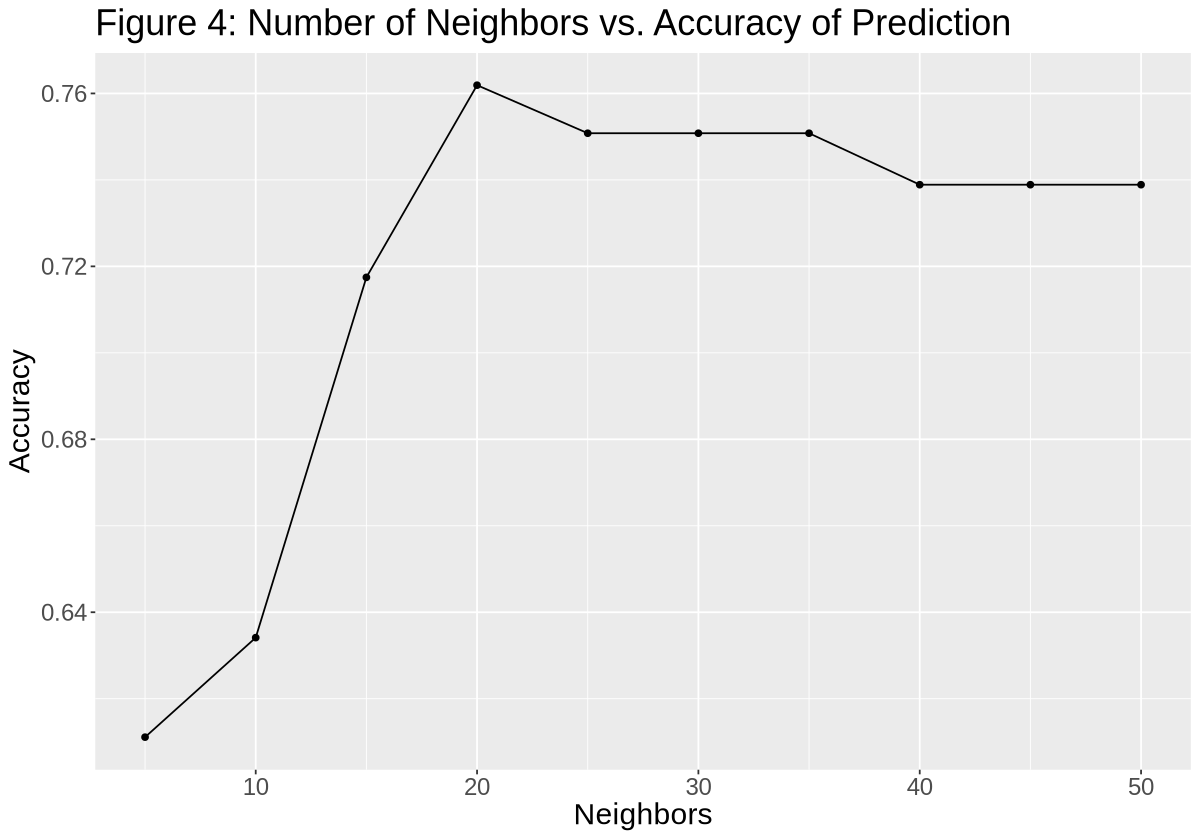

In [24]:
ggplot(tune_results, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy") +
  ggtitle("Figure 4: Number of Neighbors vs. Accuracy of Prediction") +
  theme(text = element_text(size = 18))

The $K$ value that gives the highest accuracy is $K = 20$. Now, retrain the model using this information.

In [25]:
## Create the model specification with K = 20

best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 20) |>
  set_engine("kknn") |>
  set_mode("classification") 

## Put everything in a workflow

train_best_fit <- workflow() |>
  add_recipe(train_recipe) |>
  add_model(best_spec) |>
  fit(data = players_train)

## Test the model using the testing set

players_best_predictions <- predict(train_best_fit, players_test) |>
  bind_cols(players_test)

Let's see the accuracy of the model using the `metrics` function.

In [26]:
players_best_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7142857


We see that the accuracy is $71\%$. Let's also see the confusion matrix for the predictions.

In [27]:
players_best_predictions |>
  conf_mat(truth = subscribe, estimate = .pred_class)

                Truth
Prediction       Not Subscribed Subscribed
  Not Subscribed              0          1
  Subscribed                 13         35

We can also get the precision and recall of the model.

In [28]:
players_best_predictions |> 
  precision(truth = subscribe, estimate = .pred_class, event_level = "second")

players_best_predictions |> 
  recall(truth = subscribe, estimate = .pred_class, event_level = "second")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7291667


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.9722222


The precision is $73\%$ and the recall is $97\%$.

## Discussion

### Summary

In this study, a K-nearest neighbor classification model was trained to study whether age and played hours can be used to predict whether a Minecraft player is subscribed to a game newsletter. The first classification model with $K = 5$ gave an estimated accuracy of $61\%$ after a 5-fold cross-validation was performed. To improve this accuracy, the model was tuned in order to determine the best $K$ value, which was found to be $K = 20$. The tuned model with $K = 20$ gave an accuracy of $71\%$, with a $73\%$ precision and a $97\%$ recall.

The result of this study rejects the proposed hypothesis, which stated that age and played hours could be used to predict player subscription.

### Comparing Results to the Stated Hypothesis

### Significance

### Future Questions

## References

Chen, D., & Lee, M. (2025, June 9). Project Final Report (Individual). Canvas. https://canvas.ubc.ca